In [68]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns 
import tensorflow as tf

In [69]:
df = pd.read_csv("C:/Users/USER/OneDrive - Universidad de los andes/Analitica comp/Proyecto 2/proyecto2-data-trio/productividad_limpio.csv")

In [70]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,1,0,1,0,2143,1,0,1,5,5,261,1,-1,0,0,0
1,44,2,1,0,0,29,1,0,1,5,5,151,1,-1,0,0,0
2,33,7,0,0,0,2,1,1,1,5,5,76,1,-1,0,0,0
3,47,0,0,3,0,1506,1,0,1,5,5,92,1,-1,0,0,0
4,33,11,1,3,0,1,0,0,1,5,5,198,1,-1,0,0,0


In [71]:
df.shape

(45211, 17)

In [72]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [73]:
df.dropna(inplace=True)
df.shape

(45211, 17)

In [74]:
continues_cols= [x for x in df.columns if x !='Origin']

In [75]:
continues_cols

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'y']

In [76]:
df_model_base= df[continues_cols]

In [77]:
df_model_base.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,1,0,1,0,2143,1,0,1,5,5,261,1,-1,0,0,0
1,44,2,1,0,0,29,1,0,1,5,5,151,1,-1,0,0,0
2,33,7,0,0,0,2,1,1,1,5,5,76,1,-1,0,0,0
3,47,0,0,3,0,1506,1,0,1,5,5,92,1,-1,0,0,0
4,33,11,1,3,0,1,0,0,1,5,5,198,1,-1,0,0,0


In [78]:
train = df_model_base.sample(frac=0.8, random_state=100)
train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
14789,45,0,1,0,1,0,0,1,0,16,7,154,2,-1,0,0,0
8968,41,1,0,1,0,5,0,0,1,5,6,178,1,-1,0,0,0
34685,40,1,1,0,0,906,1,0,0,5,5,67,4,-1,0,0,0
2369,25,3,1,0,0,768,1,0,1,13,5,203,1,-1,0,0,0
36561,37,4,0,2,0,0,1,0,0,12,5,631,1,344,1,3,0


In [79]:
test = df_model_base.drop(train.index)
test.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
9,43,2,1,0,0,593,1,0,1,5,5,55,1,-1,0,0,0
27,52,7,0,0,0,113,1,1,1,5,5,127,1,-1,0,0,0
28,46,1,1,0,0,-246,1,0,1,5,5,255,2,-1,0,0,0
40,44,4,2,0,0,2586,1,0,1,5,5,160,1,-1,0,0,0
44,58,5,0,3,0,96,1,0,1,5,5,616,1,-1,0,0,0


In [80]:
print(train.shape)
print(test.shape)

(36169, 17)
(9042, 17)


In [81]:
train.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,36169.000000,36169.000000,36169.000000,36169.000000,36169.000000,36169.000000,36169.000000,36169.000000,36169.000000,36169.000000,36169.000000,36169.000000,36169.000000,36169.000000,36169.000000,36169.000000,36169.000000
mean,40.935138,2.707070,0.514114,0.717908,0.018192,1360.795211,0.555614,0.161298,0.411734,15.801819,6.136858,258.421853,2.767342,40.770853,0.591888,0.295861,0.116757
std,10.619552,2.670307,0.693786,0.865336,0.133648,2978.711481,0.496904,0.367811,0.605824,8.331871,2.413137,258.155086,3.124000,100.401362,2.416253,0.704737,0.321135
min,18.000000,0.000000,0.000000,0.000000,0.000000,-8019.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
25%,33.000000,1.000000,0.000000,0.000000,0.000000,74.000000,0.000000,0.000000,0.000000,8.000000,5.000000,103.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
50%,39.000000,2.000000,0.000000,0.000000,0.000000,451.000000,1.000000,0.000000,0.000000,16.000000,6.000000,180.000000,2.000000,-1.000000,0.000000,0.000000,0.000000
75%,48.000000,4.000000,1.000000,1.000000,0.000000,1434.000000,1.000000,0.000000,1.000000,21.000000,8.000000,319.000000,3.000000,-1.000000,0.000000,0.000000,0.000000
max,95.000000,11.000000,2.000000,3.000000,1.000000,98417.000000,1.000000,1.000000,2.000000,31.000000,12.000000,4918.000000,63.000000,871.000000,275.000000,3.000000,1.000000


In [82]:
train_X = train.copy()
test_X = test.copy()

In [83]:
train.corr()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
age,1.000000,0.076209,-0.127179,0.165180,-0.017636,0.098368,-0.180920,-0.017106,0.119498,-0.009721,0.089230,-0.005212,0.006718,-0.019501,0.004510,0.013629,0.022992
job,0.076209,1.000000,0.048549,-0.004377,-0.003506,0.018904,-0.174872,-0.033585,0.009491,-0.013975,0.014039,0.005040,-0.022909,-0.018236,-0.001320,0.025310,0.058392
marital,-0.127179,0.048549,1.000000,-0.063208,0.016911,-0.031042,-0.011360,-0.016940,-0.039021,-0.002759,-0.042721,0.014256,-0.029363,0.022799,0.005688,0.024568,0.045779
education,0.165180,-0.004377,-0.063208,1.000000,-0.007025,0.039551,-0.076073,-0.071343,0.060647,-0.006661,0.007062,-0.002729,0.016980,-0.023331,-0.007973,-0.011621,0.010872
default,-0.017636,-0.003506,0.016911,-0.007025,1.000000,-0.068102,-0.003994,0.079230,0.000369,0.010910,0.013626,-0.007589,0.016098,-0.029478,-0.016821,-0.037773,-0.019858
balance,0.098368,0.018904,-0.031042,0.039551,-0.068102,1.000000,-0.068389,-0.086576,-0.001492,0.004868,0.096824,0.017383,-0.013154,0.001852,0.013119,0.034588,0.046885
housing,-0.180920,-0.174872,-0.011360,-0.076073,-0.003994,-0.068389,1.000000,0.037298,0.091735,-0.026809,-0.171742,0.006938,-0.025621,0.123877,0.036118,-0.003523,-0.138848
loan,-0.017106,-0.033585,-0.016940,-0.071343,0.079230,-0.086576,0.037298,1.000000,-0.014028,0.011243,0.022789,-0.012236,0.013940,-0.024780,-0.011327,-0.049178,-0.066048
contact,0.119498,0.009491,-0.039021,0.060647,0.000369,-0.001492,0.091735,-0.014028,1.000000,-0.004002,-0.106649,-0.024103,0.046044,-0.171345,-0.088158,-0.172452,-0.101293
day,-0.009721,-0.013975,-0.002759,-0.006661,0.010910,0.004868,-0.026809,0.011243,-0.004002,1.000000,0.102643,-0.032930,0.162957,-0.097279,-0.052240,-0.072224,-0.031084


In [84]:
train_y = train_X.pop('y')
test_y = test_X.pop('y')

In [85]:
train_X.dtypes

age          int64
job          int64
marital      int64
education    int64
default      int64
balance      int64
housing      int64
loan         int64
contact      int64
day          int64
month        int64
duration     int64
campaign     int64
pdays        int64
previous     int64
poutcome     int64
dtype: object

In [86]:
norm = tf.keras.layers.Normalization()

In [87]:
norm.adapt(np.array(train_X))

In [88]:
train_X[:1]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
14789,45,0,1,0,1,0,0,1,0,16,7,154,2,-1,0,0


## Modelos con todas las variables menos categoricas
## Modelo Base

In [89]:
linear_model = tf.keras.Sequential([
    norm,
    tf.keras.layers.Dense(units=1)
])

In [90]:
linear_model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_2 (Normalization) │ (36169, 16)            │            33 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33 (136.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 33 (136.00 B)

In [91]:
linear_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [92]:
%%time
history = linear_model.fit(
    train_X,
    train_y,
    epochs=100,
    validation_split = 0.2)

Epoch 1/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2701 - val_loss: 0.2935
Epoch 2/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2363 - val_loss: 0.2627
Epoch 3/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2231 - val_loss: 0.2562
Epoch 4/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2221 - val_loss: 0.2265
Epoch 5/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2297 - val_loss: 0.2520
Epoch 6/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2326 - val_loss: 0.1979
Epoch 7/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2198 - val_loss: 0.1680
Epoch 8/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2250 - val_loss: 0.2200
Epoch 9/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2210 - val_loss: 0.2829
Epoch 10/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2295 - val_loss: 0.2265
Epoch 11/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2234 - val_loss: 0.2357
Epoch 12/100
905/905 ━━━━━━━━━━━━━━━━━━━━

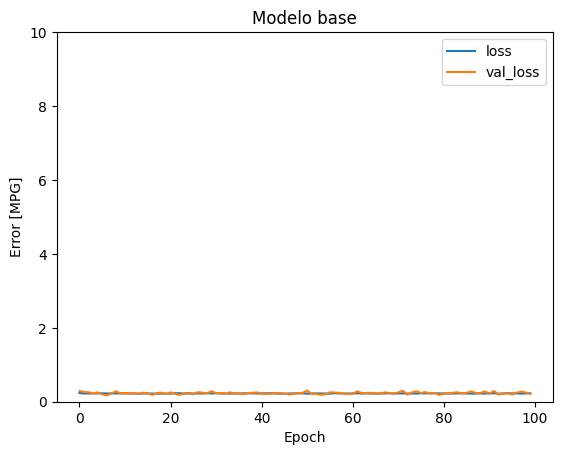

In [93]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.ylim([0, 10])
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.title("Modelo base")
plt.legend()

In [94]:
test_res = {}
test_res['modelo_base'] = linear_model.evaluate(
    test_X, test_y, verbose=0)

In [95]:
test_res

{'modelo_base': 0.2090759426355362}

In [96]:
linear_model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_2 (Normalization) │ (None, 16)             │            33 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 86 (352.00 B)

 Trainable params: 17 (68.00 B)

 Non-trainable params: 33 (136.00 B)

 Optimizer params: 36 (148.00 B)

## Modelo 1 con 6 neuronas

In [97]:
linear_model_6N = tf.keras.Sequential([
    norm,
    tf.keras.layers.Dense(units=6)
])

In [98]:
linear_model_6N.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [ ]:
%%time
history = linear_model_6N.fit(
    train_X,
    train_y,
    epochs=100,
    validation_split = 0.2)

Epoch 1/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.2465 - val_loss: 0.2492
Epoch 2/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.2276 - val_loss: 0.2087
Epoch 3/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.2295 - val_loss: 0.2622
Epoch 4/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.2298 - val_loss: 0.2335
Epoch 5/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.2211 - val_loss: 0.2622
Epoch 6/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.2249 - val_loss: 0.2333
Epoch 7/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.2186 - val_loss: 0.2055
Epoch 8/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 0.2237 - val_loss: 0.2586
Epoch 9/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.2295 - val_loss: 0.2237
Epoch 10/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.2258 - val_loss: 0.2118
Epoch 11/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.2238 - val_loss: 0.2597
Epoch 12/100
905/905 ━━━━━━━━━━━━━━━━━━━━

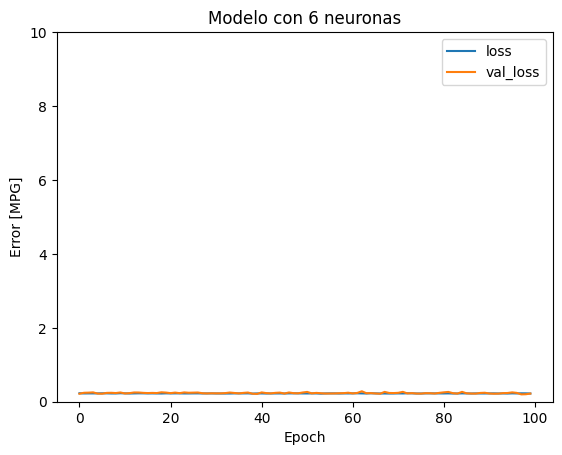

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.ylim([0, 10])
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.title("Modelo con 6 neuronas")
plt.legend()

In [ ]:
test_res['modelo 6 neuronas'] = linear_model_6N.evaluate(
    test_X, test_y, verbose=0)
test_res

{'modelo_base': 0.21303343772888184, 'modelo 6 neuronas': 0.21357500553131104}

In [ ]:
linear_model_6N.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_1 (Normalization) │ (None, 16)             │            33 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           102 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 341 (1.34 KB)

 Trainable params: 102 (408.00 B)

 Non-trainable params: 33 (136.00 B)

 Optimizer params: 206 (828.00 B)

## Modelo con 3 neuronas

In [ ]:
linear_model_3N = tf.keras.Sequential([
    norm,
    tf.keras.layers.Dense(units=3)
])

In [ ]:
linear_model_3N.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [ ]:
%%time
history = linear_model_3N.fit(
    train_X,
    train_y,
    epochs=100,
    validation_split = 0.2)

Epoch 1/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2496 - val_loss: 0.2453
Epoch 2/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2244 - val_loss: 0.2137
Epoch 3/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2211 - val_loss: 0.2193
Epoch 4/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2253 - val_loss: 0.2450
Epoch 5/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2212 - val_loss: 0.2521
Epoch 6/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2250 - val_loss: 0.2391
Epoch 7/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2373 - val_loss: 0.2074
Epoch 8/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2177 - val_loss: 0.2389
Epoch 9/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2256 - val_loss: 0.2373
Epoch 10/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2259 - val_loss: 0.2479
Epoch 11/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2291 - val_loss: 0.2619
Epoch 12/100
905/905 ━━━━━━━━━━━━━━━━━━━━

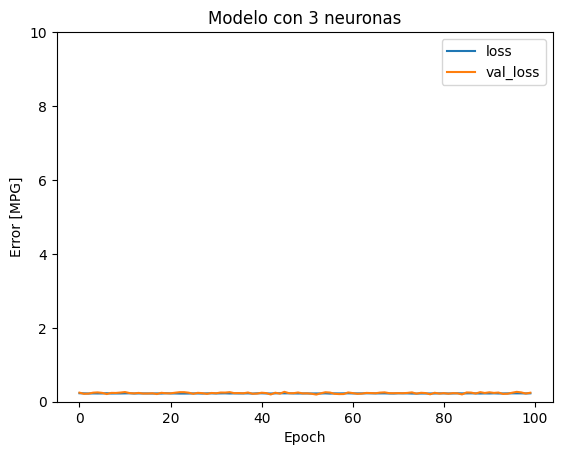

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.ylim([0, 10])
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.title("Modelo con 3 neuronas")
plt.legend()

In [ ]:
test_res['modelo 3 neuronas'] = linear_model_3N.evaluate(
    test_X, test_y, verbose=0)
test_res

{'modelo_base': 0.21303343772888184,
 'modelo 6 neuronas': 0.21357500553131104,
 'modelo 3 neuronas': 0.24080635607242584}

In [ ]:
linear_model_3N.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_1 (Normalization) │ (None, 16)             │            33 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 188 (760.00 B)

 Trainable params: 51 (204.00 B)

 Non-trainable params: 33 (136.00 B)

 Optimizer params: 104 (420.00 B)

## Modelo 18 neuronas

In [ ]:
linear_model_18N = tf.keras.Sequential([
    norm,
    tf.keras.layers.Dense(units=18)
])

In [ ]:
linear_model_18N.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [ ]:
%%time
history = linear_model_18N.fit(
    train_X,
    train_y,
    epochs=100,
    validation_split = 0.2)

Epoch 1/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.2494 - val_loss: 0.2192
Epoch 2/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2205 - val_loss: 0.2308
Epoch 3/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2230 - val_loss: 0.2380
Epoch 4/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2274 - val_loss: 0.2201
Epoch 5/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2239 - val_loss: 0.2195
Epoch 6/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2212 - val_loss: 0.2662
Epoch 7/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2286 - val_loss: 0.2514
Epoch 8/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2270 - val_loss: 0.2195
Epoch 9/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2305 - val_loss: 0.2345
Epoch 10/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2256 - val_loss: 0.2293
Epoch 11/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2252 - val_loss: 0.2303
Epoch 12/100
905/905 ━━━━━━━━━━━━━━━━━━━━

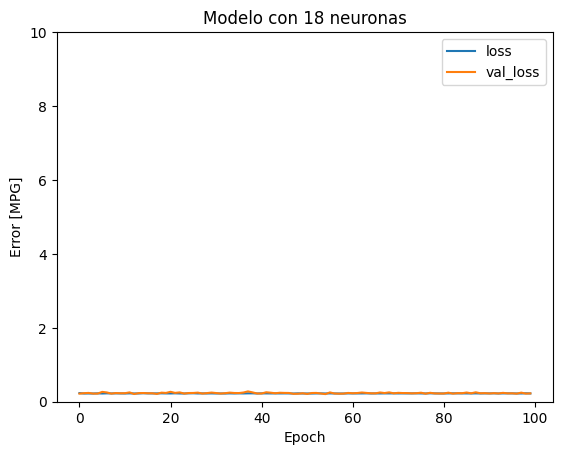

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.ylim([0, 10])
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.title("Modelo con 18 neuronas")
plt.legend()

In [ ]:
test_res['modelo 18 neuronas'] = linear_model_18N.evaluate(
    test_X, test_y, verbose=0)
test_res

{'modelo_base': 0.21303343772888184,
 'modelo 6 neuronas': 0.21357500553131104,
 'modelo 3 neuronas': 0.24080635607242584,
 'modelo 18 neuronas': 0.22298401594161987}

In [ ]:
linear_model_18N.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_1 (Normalization) │ (None, 16)             │            33 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 18)             │           306 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 953 (3.73 KB)

 Trainable params: 306 (1.20 KB)

 Non-trainable params: 33 (136.00 B)

 Optimizer params: 614 (2.40 KB)

## Modificamos unicamente el numero de capas

## Modelo con 3 capaz

In [ ]:
modelo_3_layers = tf.keras.Sequential([
      norm,
      tf.keras.layers.Dense(1),
      tf.keras.layers.Dense(1),
      tf.keras.layers.Dense(1)
  ])

In [ ]:
modelo_3_layers.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [ ]:
%%time
history = modelo_3_layers.fit(
    train_X,
    train_y,
    epochs=100,
    validation_split = 0.2)

Epoch 1/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1308 - val_loss: 0.1280
Epoch 2/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1274 - val_loss: 0.1385
Epoch 3/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1274 - val_loss: 0.1403
Epoch 4/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1232 - val_loss: 0.1402
Epoch 5/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1257 - val_loss: 0.1224
Epoch 6/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1246 - val_loss: 0.1377
Epoch 7/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1272 - val_loss: 0.1679
Epoch 8/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1276 - val_loss: 0.1271
Epoch 9/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1239 - val_loss: 0.1214
Epoch 10/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1251 - val_loss: 0.1270
Epoch 11/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1265 - val_loss: 0.1244
Epoch 12/100
905/905 ━━━━━━━━━━━━━━━━━━━━

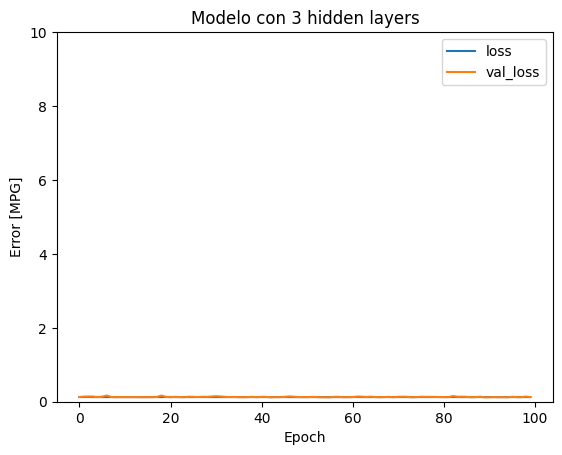

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.ylim([0, 10])
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.title("Modelo con 3 hidden layers")
plt.legend()

In [ ]:
test_res['modelo 3 hidden layers'] = modelo_3_layers.evaluate(
    test_X, test_y, verbose=0)
test_res

{'modelo_base': 0.21303343772888184,
 'modelo 6 neuronas': 0.21357500553131104,
 'modelo 3 neuronas': 0.24080635607242584,
 'modelo 18 neuronas': 0.22298401594161987,
 'modelo 3 hidden layers': 0.1244799792766571}

In [ ]:
modelo_3_layers.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_1 (Normalization) │ (None, 16)             │            33 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            17 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             2 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 98 (400.00 B)

 Trainable params: 21 (84.00 B)

 Non-trainable params: 33 (136.00 B)

 Optimizer params: 44 (180.00 B)

## Modelo con 6 capaz

In [ ]:
modelo_6_layers = tf.keras.Sequential([
      norm,
      tf.keras.layers.Dense(1),
      tf.keras.layers.Dense(1),
      tf.keras.layers.Dense(1),
      tf.keras.layers.Dense(1),
      tf.keras.layers.Dense(1),
      tf.keras.layers.Dense(1)
  ])

In [ ]:
modelo_6_layers.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [ ]:
%%time
history = modelo_6_layers.fit(
    train_X,
    train_y,
    epochs=100,
    validation_split = 0.2)

Epoch 1/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1409 - val_loss: 0.1300
Epoch 2/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1341 - val_loss: 0.1229
Epoch 3/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1293 - val_loss: 0.1306
Epoch 4/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1274 - val_loss: 0.1285
Epoch 5/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1332 - val_loss: 0.1236
Epoch 6/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1311 - val_loss: 0.1322
Epoch 7/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1275 - val_loss: 0.1200
Epoch 8/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1306 - val_loss: 0.1358
Epoch 9/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1278 - val_loss: 0.1236
Epoch 10/100
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1295 - val_loss: 0.1355
Epoch 11/100
895/905 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1259

KeyboardInterrupt: 

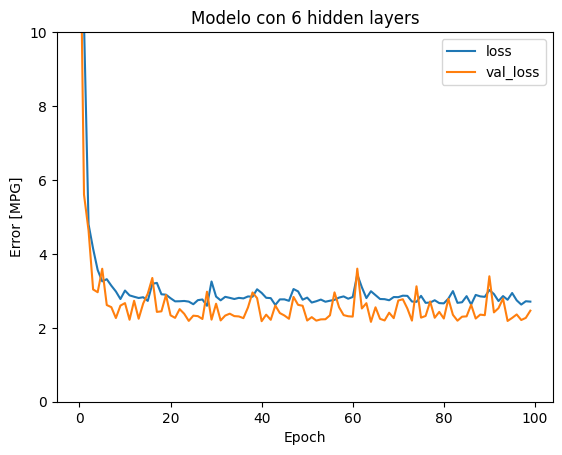

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.ylim([0, 10])
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.title("Modelo con 6 hidden layers")
plt.legend()

In [ ]:
test_res['modelo 6 hidden layers'] = modelo_6_layers.evaluate(
    test_X, test_y, verbose=0)
test_res

{'modelo_base': 2.782327175140381,
 'modelo 6 neuronas': 2.7291948795318604,
 'modelo 3 neuronas': 2.7332277297973633,
 'modelo 18 neuronas': 2.7797985076904297,
 'modelo 3 hidden layers': 2.783496856689453,
 'modelo 6 hidden layers': 2.8818235397338867}

In [ ]:
modelo_6_layers.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 6)              │            13 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │             7 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │             2 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │             2 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │             2 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │             2 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 66 (272.00 B)

 Trainable params: 17 (68.00 B)

 Non-trainable params: 13 (56.00 B)

 Optimizer params: 36 (148.00 B)

## Modelo con 18 hidden layers

In [ ]:
modelo_18_layers = tf.keras.Sequential([
      norm,
      tf.keras.layers.Dense(1),
      tf.keras.layers.Dense(1),
      tf.keras.layers.Dense(1),
      tf.keras.layers.Dense(1),
      tf.keras.layers.Dense(1),
      tf.keras.layers.Dense(1),
      tf.keras.layers.Dense(1),
      tf.keras.layers.Dense(1),
      tf.keras.layers.Dense(1),
      tf.keras.layers.Dense(1),
      tf.keras.layers.Dense(1),
      tf.keras.layers.Dense(1),
      tf.keras.layers.Dense(1),
      tf.keras.layers.Dense(1),
      tf.keras.layers.Dense(1),
      tf.keras.layers.Dense(1),
      tf.keras.layers.Dense(1),
      tf.keras.layers.Dense(1)
  ])

In [ ]:
modelo_18_layers.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [ ]:
%%time
history = modelo_18_layers.fit(
    train_X,
    train_y,
    epochs=100,
    validation_split = 0.2)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 22.8419 - val_loss: 6.9667
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 12.0061 - val_loss: 11.9440
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 11.8734 - val_loss: 6.8133
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.9437 - val_loss: 6.5474
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.7167 - val_loss: 6.6679
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7.0313 - val_loss: 7.2874
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.8293 - val_loss: 6.5612
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 6.7991 - val_loss: 6.6680
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.3470 - val_loss: 6.7409
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 6.3505 - val_loss: 6.5966
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.9380 - val_loss: 6.8390
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.3973 - val_loss: 6

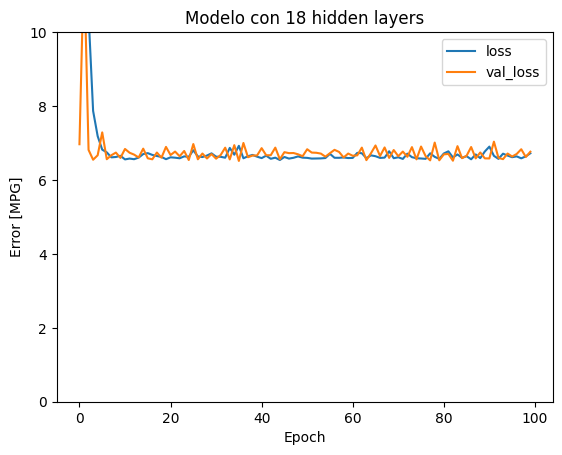

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.ylim([0, 10])
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.title("Modelo con 18 hidden layers")
plt.legend()

In [ ]:
test_res['modelo 18 hidden layers'] = modelo_18_layers.evaluate(
    test_X, test_y, verbose=0)
test_res

{'modelo_base': 2.782327175140381,
 'modelo 6 neuronas': 2.7291948795318604,
 'modelo 3 neuronas': 2.7332277297973633,
 'modelo 18 neuronas': 2.7797985076904297,
 'modelo 3 hidden layers': 2.783496856689453,
 'modelo 6 hidden layers': 2.8818235397338867,
 'modelo 18 hidden layers': 6.364817142486572}

In [ ]:
modelo_18_layers.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 6)              │            13 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │             7 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │             2 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │             2 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 1)              │             2 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │             2 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │             2 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │             2 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │             2 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 1)              │             2 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 1)              │             2 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │             2 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 1)              │             2 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 1)              │             2 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 1)              │             2 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 1)              │             2 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 1)              │             2 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 1)              │             2 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138 (560.00 B)

 Trainable params: 41 (164.00 B)

 Non-trainable params: 13 (56.00 B)

 Optimizer params: 84 (340.00 B)

## Modificando el tipo de funcion de activacion

## Funcion de activacion SGD

In [ ]:
modelo_sgd= tf.keras.Sequential([
    norm,
    tf.keras.layers.Dense(units=1)
])

In [ ]:
modelo_sgd.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01,momentum=0.5),
    loss='mean_absolute_error')

In [ ]:
%%time
history = modelo_sgd.fit(
    train_X,
    train_y,
    epochs=100,
    validation_split = 0.2)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 23.7449 - val_loss: 22.1569
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 23.3282 - val_loss: 22.0002
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 23.7240 - val_loss: 21.8439
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 24.3708 - val_loss: 21.6877
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 23.3064 - val_loss: 21.5301
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 23.0808 - val_loss: 21.3736
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 22.7909 - val_loss: 21.2177
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 22.6577 - val_loss: 21.0612
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 22.1276 - val_loss: 20.9046
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 23.3831 - val_loss: 20.7527
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 22.7107 - val_loss: 20.5945
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 21.7

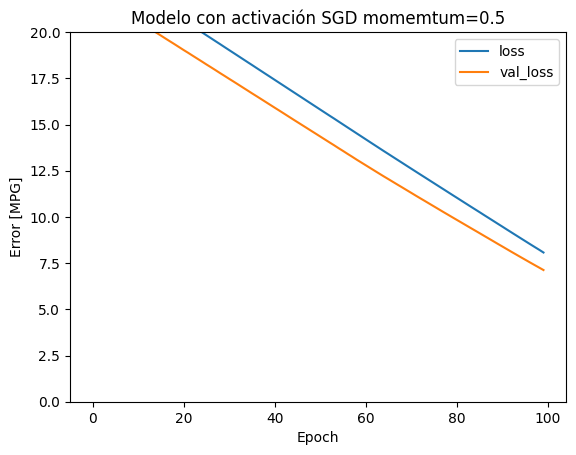

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.ylim([0, 20])
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.title("Modelo con activación SGD momemtum=0.5")
plt.legend()

In [ ]:
test_res['modelo con SGD'] = modelo_sgd.evaluate(
    test_X, test_y, verbose=0)
test_res

{'modelo_base': 2.782327175140381,
 'modelo 6 neuronas': 2.7291948795318604,
 'modelo 3 neuronas': 2.7332277297973633,
 'modelo 18 neuronas': 2.7797985076904297,
 'modelo 3 hidden layers': 2.783496856689453,
 'modelo 6 hidden layers': 2.8818235397338867,
 'modelo 18 hidden layers': 6.364817142486572,
 'modelo con SGD': 7.255080223083496}

In [ ]:
modelo_sgd.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 6)              │            13 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29 (124.00 B)

 Trainable params: 7 (28.00 B)

 Non-trainable params: 13 (56.00 B)

 Optimizer params: 9 (40.00 B)

## Modelo con  RMSprop

In [ ]:
modelo_rmsprop= tf.keras.Sequential([
    norm,
    tf.keras.layers.Dense(units=1)
])

In [ ]:
modelo_rmsprop.compile(
    optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001, rho=0.01),
    loss='mean_absolute_error')

In [ ]:
%%time
history = modelo_rmsprop.fit(
    train_X,
    train_y,
    epochs=100,
    validation_split = 0.2)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 24.7090 - val_loss: 22.3307
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 23.6883 - val_loss: 22.3237
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 23.6512 - val_loss: 22.3158
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 23.7730 - val_loss: 22.3085
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 24.1117 - val_loss: 22.3017
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 23.6233 - val_loss: 22.2958
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 23.9132 - val_loss: 22.2887
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 24.0889 - val_loss: 22.2822
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 22.9701 - val_loss: 22.2766
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 23.8297 - val_loss: 22.2688
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 23.7038 - val_loss: 22.2614
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 23.0

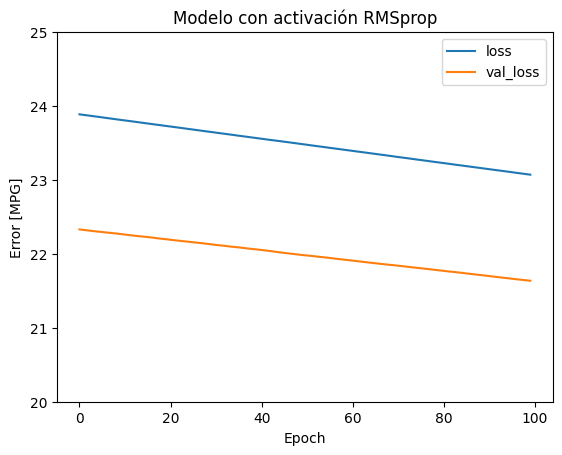

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.ylim([20, 25])
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.title("Modelo con activación RMSprop")
plt.legend()

In [ ]:
test_res['modelo con RMSprop'] = modelo_rmsprop.evaluate(
    test_X, test_y, verbose=0)
test_res

{'modelo_base': 2.782327175140381,
 'modelo 6 neuronas': 2.7291948795318604,
 'modelo 3 neuronas': 2.7332277297973633,
 'modelo 18 neuronas': 2.7797985076904297,
 'modelo 3 hidden layers': 2.783496856689453,
 'modelo 6 hidden layers': 2.8818235397338867,
 'modelo 18 hidden layers': 6.364817142486572,
 'modelo con SGD': 7.255080223083496,
 'modelo con RMSprop': 22.048364639282227}

In [ ]:
modelo_rmsprop.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 6)              │            13 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29 (124.00 B)

 Trainable params: 7 (28.00 B)

 Non-trainable params: 13 (56.00 B)

 Optimizer params: 9 (40.00 B)

## Modelo con Nadam

In [ ]:
modelo_nadam= tf.keras.Sequential([
    norm,
    tf.keras.layers.Dense(units=1)
])

In [ ]:
modelo_nadam.compile(
    optimizer = tf.keras.optimizers.Nadam(learning_rate=0.00001),
    loss='mean_absolute_error')

In [ ]:
%%time
history = modelo_nadam.fit(
    train_X,
    train_y,
    epochs=100,
    validation_split = 0.2)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 23.5453 - val_loss: 22.1676
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 23.2901 - val_loss: 22.1676
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 23.8499 - val_loss: 22.1675
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 23.2138 - val_loss: 22.1674
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 23.1724 - val_loss: 22.1674
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 24.0847 - val_loss: 22.1673
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 23.8745 - val_loss: 22.1672
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 24.2426 - val_loss: 22.1672
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 23.8933 - val_loss: 22.1671
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 23.5147 - val_loss: 22.1670
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 23.9311 - val_loss: 22.1670
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 23.9

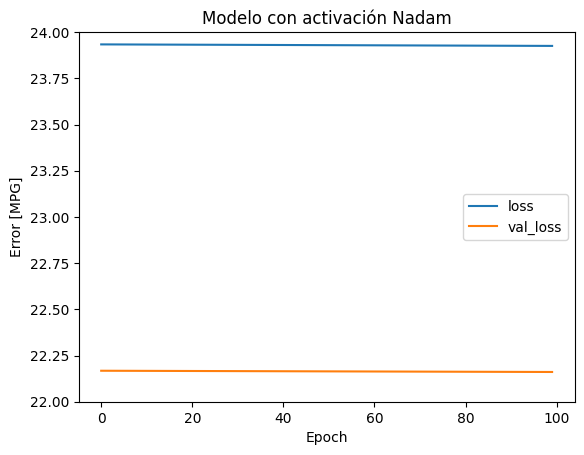

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.ylim([22, 24])
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.title("Modelo con activación Nadam")
plt.legend()

In [ ]:
test_res['modelo con Nadam'] = modelo_nadam.evaluate(
    test_X, test_y, verbose=0)
test_res

{'modelo_base': 2.782327175140381,
 'modelo 6 neuronas': 2.7291948795318604,
 'modelo 3 neuronas': 2.7332277297973633,
 'modelo 18 neuronas': 2.7797985076904297,
 'modelo 3 hidden layers': 2.783496856689453,
 'modelo 6 hidden layers': 2.8818235397338867,
 'modelo 18 hidden layers': 6.364817142486572,
 'modelo con SGD': 7.255080223083496,
 'modelo con RMSprop': 22.048364639282227,
 'modelo con Nadam': 22.81260108947754}

In [ ]:
modelo_nadam.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 6)              │            13 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37 (156.00 B)

 Trainable params: 7 (28.00 B)

 Non-trainable params: 13 (56.00 B)

 Optimizer params: 17 (72.00 B)

## Modelos que optimizarian el MAE

## Modelo few hidden layer and couple of neurons

In [ ]:
modelo_3_layers_3_neurons = tf.keras.Sequential([
      norm,
      tf.keras.layers.Dense(24, activation='relu'),
      tf.keras.layers.Dense(24, activation='relu'),
      tf.keras.layers.Dense(3)
  ])

In [ ]:
modelo_3_layers_3_neurons.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [ ]:
%%time
history = modelo_3_layers_3_neurons.fit(
  train_X,
  train_y,
  validation_split=0.2,
  epochs=100)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 18.4311 - val_loss: 7.6328
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7.6487 - val_loss: 2.7871
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.7050 - val_loss: 3.4054
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.1783 - val_loss: 2.6005
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.8376 - val_loss: 1.9826
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.7064 - val_loss: 2.0924
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.2951 - val_loss: 2.1296
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.5596 - val_loss: 2.1967
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.7580 - val_loss: 2.0862
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.3386 - val_loss: 2.2747
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.5107 - val_loss: 2.8447
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.3538 - val_loss: 1.8616

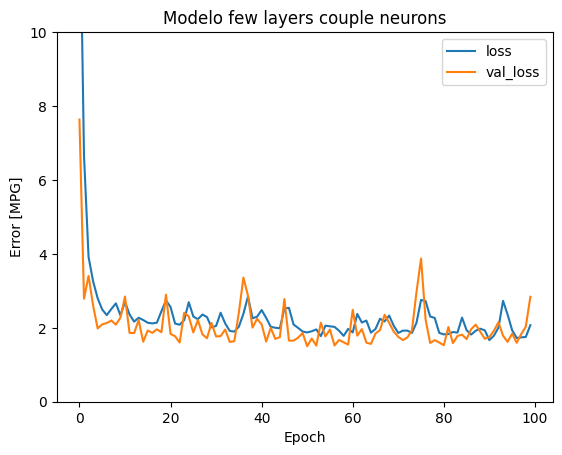

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.ylim([0, 10])
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.title("Modelo few layers couple neurons")
plt.legend()

In [ ]:
test_res['modelo few hidden layers couple neurons'] = modelo_3_layers_3_neurons.evaluate(
    test_X, test_y, verbose=0)
test_res

{'modelo_base': 2.782327175140381,
 'modelo 6 neuronas': 2.7291948795318604,
 'modelo 3 neuronas': 2.7332277297973633,
 'modelo 18 neuronas': 2.7797985076904297,
 'modelo 3 hidden layers': 2.783496856689453,
 'modelo 6 hidden layers': 2.8818235397338867,
 'modelo 18 hidden layers': 6.364817142486572,
 'modelo con SGD': 7.255080223083496,
 'modelo con RMSprop': 22.048364639282227,
 'modelo con Nadam': 22.81260108947754,
 'modelo few hidden layers couple neurons': 2.894277811050415}

In [ ]:
modelo_3_layers_3_neurons.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 6)              │            13 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 24)             │           168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 24)             │           600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 3)              │            75 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,544 (9.95 KB)

 Trainable params: 843 (3.29 KB)

 Non-trainable params: 13 (56.00 B)

 Optimizer params: 1,688 (6.60 KB)

## Model with few layers, couple of neurons

In [ ]:
modelo_3_layers_3_neurons_SGD = tf.keras.Sequential([
      norm,
      tf.keras.layers.Dense(24, activation='relu'),
      tf.keras.layers.Dense(24, activation='relu'),
      tf.keras.layers.Dense(3)
  ])

In [ ]:
modelo_3_layers_3_neurons_SGD.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01,momentum=0.5),
    loss='mean_absolute_error')

In [ ]:
%%time
history = modelo_3_layers_3_neurons_SGD.fit(
  train_X,
  train_y,
  validation_split=0.2,
  epochs=100)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 23.4875 - val_loss: 22.1552
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 23.3966 - val_loss: 21.8483
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 23.0087 - val_loss: 21.4735
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 22.8648 - val_loss: 20.9756
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 22.0182 - val_loss: 20.2485
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 21.6364 - val_loss: 19.1128
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 20.0734 - val_loss: 17.1794
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 18.3256 - val_loss: 13.9154
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 14.6205 - val_loss: 9.3201
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.1811 - val_loss: 4.8460
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.7902 - val_loss: 4.2240
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.5888 - 

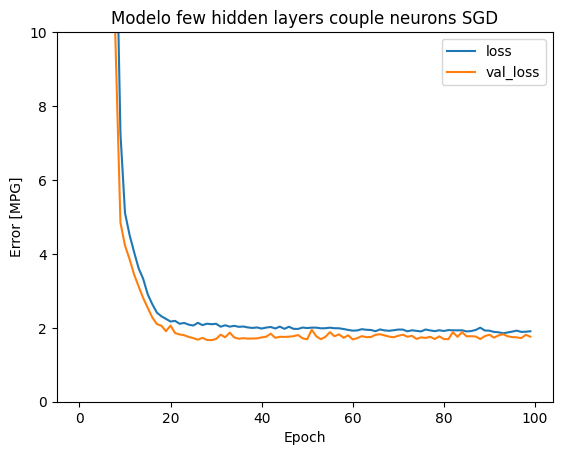

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.ylim([0, 10])
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.title("Modelo few hidden layers couple neurons SGD")
plt.legend()

In [ ]:
test_res['modelo few hidden layers couple neurons SGD'] = modelo_3_layers_3_neurons_SGD.evaluate(
    test_X, test_y, verbose=0)
test_res

{'modelo_base': 2.782327175140381,
 'modelo 6 neuronas': 2.7291948795318604,
 'modelo 3 neuronas': 2.7332277297973633,
 'modelo 18 neuronas': 2.7797985076904297,
 'modelo 3 hidden layers': 2.783496856689453,
 'modelo 6 hidden layers': 2.8818235397338867,
 'modelo 18 hidden layers': 6.364817142486572,
 'modelo con SGD': 7.255080223083496,
 'modelo con RMSprop': 22.048364639282227,
 'modelo con Nadam': 22.81260108947754,
 'modelo few hidden layers couple neurons': 2.894277811050415,
 'modelo few hidden layers couple neurons SGD': 2.2519612312316895}

In [ ]:
modelo_3_layers_3_neurons_SGD.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 6)              │            13 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 24)             │           168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 24)             │           600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 3)              │            75 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,701 (6.65 KB)

 Trainable params: 843 (3.29 KB)

 Non-trainable params: 13 (56.00 B)

 Optimizer params: 845 (3.30 KB)